<a href="https://colab.research.google.com/github/rizkiar00/K-Nearest-Neighbour/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
!git clone https://github.com/rizkiar00/K-Nearest-Neighbour

fatal: destination path 'K-Nearest-Neighbour' already exists and is not an empty directory.


In [0]:
data = pd.read_csv('K-Nearest-Neighbour/DataTrain_Tugas3_AI.csv',skipinitialspace=True,usecols = [1,2,3,4,5,6]) #Masukkan Data dan Buat Data Training
scaler = StandardScaler() #Buat Standarisasi Data(Gak Wajib)
scaler.fit(data.drop('Y',axis=1))
scaled_features = scaler.transform(data.drop('Y',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1]) #Standarisasi Data
df_feat
#datasample = datatraining.sample(n=200)
#datasample

,X1,X2,X3,X4,X5
0,-1.567185,-0.631270,0.310029,0.741834,0.138487
1,0.004949,-0.031837,-1.009396,-0.441010,-0.568453
2,-0.670462,-0.242040,1.025048,0.122914,-0.479438
3,0.851123,-0.434445,-0.509762,-0.881942,0.591813
4,-1.618119,0.339702,-0.538265,-0.409501,-1.895956
5,0.589869,-0.591377,-0.449671,-1.389995,0.240890
6,-1.553310,-0.520873,0.272442,-1.305728,0.272814
7,-1.539884,-0.726503,0.805480,-1.290393,-0.613251
8,-0.791331,-1.375537,0.158048,0.849980,0.293117
9,1.147456,0.391038,-0.723785,0.355029,0.174334


In [0]:
#datasisa = datatraining.drop(datasample.index) #Buat data yang ada datatraining tapi tidak ada di datasample
#datasisahasil = datasisa.pop('Y') #Pisahin inputan sama output
#datasamplehasil = datasample.pop('Y')

X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['Y'],
                                                    test_size=0.30)

In [0]:
def jarak(x,y): #Fungsi Jarak
  return math.sqrt((x[1]-y[1])**2+(x[2]-y[2])**2+(x[3]-y[3])**2+(x[3]-y[3])**2+(x[4]-y[4])**2(x[4]-y[4])**2)

In [0]:
error_rate = []
#arrdatasamplehasil = datasamplehasil.as_matrix(columns=None)
for i in range(1,50):
  #knn = KNeighborsClassifier(n_neighbors=i) 
  #knn.fit(datasisa,datasisahasil) #kelas dasar input aja,kelas dasar output aja
  #pred = knn.predict(datasample) #kelas yang diprediksi
  #error_rate.append(np.mean(pred != arrdatasamplehasil))
  knn = KNeighborsClassifier(n_neighbors=i,weights = 'distance')#Jumlah tetangga,semakin deket semakin pengaruh
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

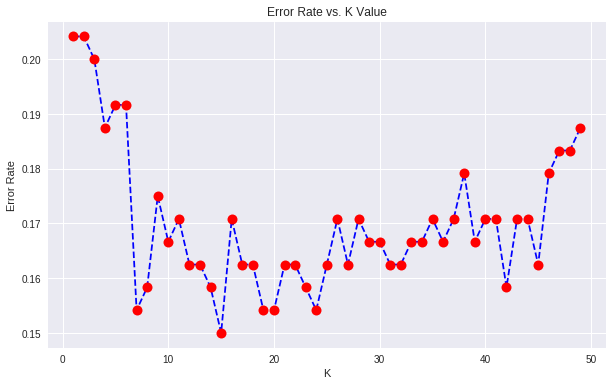

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
datatest = pd.read_csv('K-Nearest-Neighbour/DataTest_Tugas3_AI.csv',skipinitialspace=True)
datatesthasil = datatest.pop('Y')
datatesthasil

0      ?
1      ?
2      ?
3      ?
4      ?
5      ?
6      ?
7      ?
8      ?
9      ?
10     ?
11     ?
12     ?
13     ?
14     ?
15     ?
16     ?
17     ?
18     ?
19     ?
20     ?
21     ?
22     ?
23     ?
24     ?
25     ?
26     ?
27     ?
28     ?
29     ?
      ..
170    ?
171    ?
172    ?
173    ?
174    ?
175    ?
176    ?
177    ?
178    ?
179    ?
180    ?
181    ?
182    ?
183    ?
184    ?
185    ?
186    ?
187    ?
188    ?
189    ?
190    ?
191    ?
192    ?
193    ?
194    ?
195    ?
196    ?
197    ?
198    ?
199    ?
Name: Y, Length: 200, dtype: object